In [85]:
import numpy as np
import pandas as pd
import pylab as plt
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
import datetime
from datetime import datetime
from datetime import timedelta

In [86]:
datos=pd.read_csv( r'owid-covid-data.csv')
datos.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [87]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134235 entries, 0 to 134234
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    134235 non-null  object 
 1   continent                                   125670 non-null  object 
 2   location                                    134235 non-null  object 
 3   date                                        134235 non-null  object 
 4   total_cases                                 126859 non-null  float64
 5   new_cases                                   126857 non-null  float64
 6   new_cases_smoothed                          125814 non-null  float64
 7   total_deaths                                115686 non-null  float64
 8   new_deaths                                  115882 non-null  float64
 9   new_deaths_smoothed                         125814 non-null  float64
 

In [88]:
lista_pais = datos['location'].unique()
print(sorted(lista_pais))

['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Europe', 'European Union', 'Faeroe Islands', 'Falkland Islands', 'Fiji', 'Finland', 'France', 'F

In [89]:
paises_comp = datos[datos.location.isin(['Chile','Colombia','Uruguay','Spain','Germany','United Kingdom'])]
paises_comp['location'].unique()

array(['Chile', 'Colombia', 'Germany', 'Spain', 'United Kingdom',
       'Uruguay'], dtype=object)

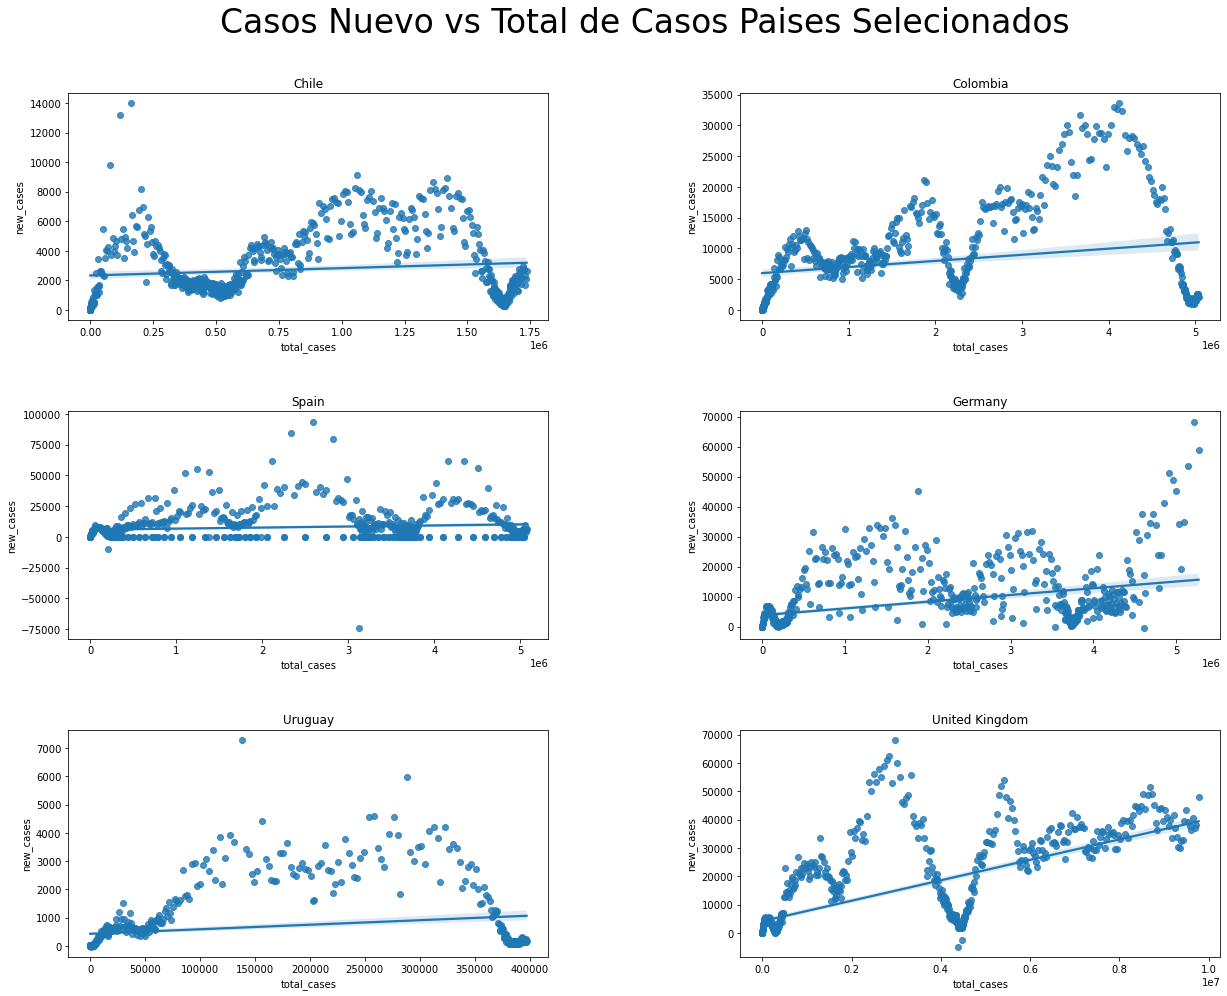

In [90]:
fig, ((ax1, ax2), (ax3, ax4),(ax5, ax6)) = plt.subplots(3, 2,figsize=(20,15))

sns.regplot(x='total_cases',y='new_cases',data=paises_comp[paises_comp['location']=='Chile'],ax=ax1).set_title('Chile')
sns.regplot(x='total_cases',y='new_cases',data=paises_comp[paises_comp['location']=='Colombia'],ax=ax2).set_title('Colombia')
sns.regplot(x='total_cases',y='new_cases',data=paises_comp[paises_comp['location']=='Spain'],ax=ax3).set_title('Spain')
sns.regplot(x='total_cases',y='new_cases',data=paises_comp[paises_comp['location']=='Germany'],ax=ax4).set_title('Germany')
sns.regplot(x='total_cases',y='new_cases',data=paises_comp[paises_comp['location']=='Uruguay'],ax=ax5).set_title('Uruguay')
sns.regplot(x='total_cases',y='new_cases',data=paises_comp[paises_comp['location']=='United Kingdom'],ax=ax6).set_title('United Kingdom')

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
fig.suptitle('Casos Nuevo vs Total de Casos Paises Selecionados', fontsize=33)

plt.show()

In [91]:
df_cl= paises_comp[paises_comp['location']=='Chile']
df_co= paises_comp[paises_comp['location']=='Colombia']
df_sp= paises_comp[paises_comp['location']=='Spain']
df_ge= paises_comp[paises_comp['location']=='Germany']
df_ur= paises_comp[paises_comp['location']=='Uruguay']
df_uk= paises_comp[paises_comp['location']=='United Kingdom']

In [92]:
df_cl['dias']=np.arange(0,len(df_cl['location']))
df_co['dias']=np.arange(0,len(df_co['location']))
df_sp['dias']=np.arange(0,len(df_sp['location']))
df_ge['dias']=np.arange(0,len(df_ge['location']))
df_ur['dias']=np.arange(0,len(df_ur['location']))
df_uk['dias']=np.arange(0,len(df_uk['location']))

<ipython-input-92-e1b1be1fbc50>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cl['dias']=np.arange(0,len(df_cl['location']))
<ipython-input-92-e1b1be1fbc50>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_co['dias']=np.arange(0,len(df_co['location']))
<ipython-input-92-e1b1be1fbc50>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

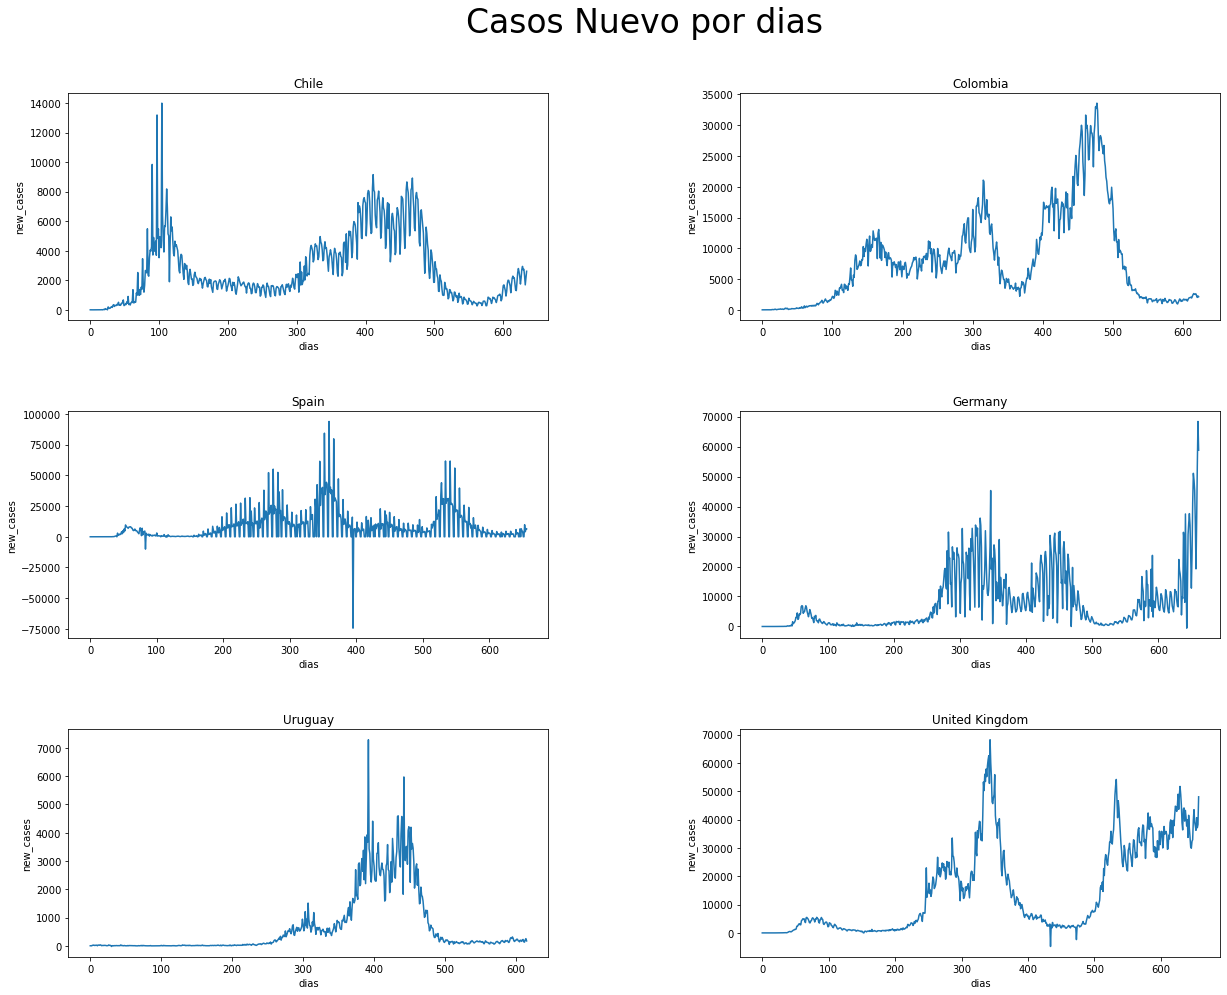

In [93]:
fig, ((ax1, ax2), (ax3, ax4),(ax5, ax6))= plt.subplots(3,2,figsize=(20,15))

sns.lineplot(x='dias',y='new_cases',data=df_cl,ax=ax1).set_title('Chile')
sns.lineplot(x='dias',y='new_cases',data=df_co,ax=ax2).set_title('Colombia')
sns.lineplot(x='dias',y='new_cases',data=df_sp,ax=ax3).set_title('Spain')
sns.lineplot(x='dias',y='new_cases',data=df_ge,ax=ax4).set_title('Germany')
sns.lineplot(x='dias',y='new_cases',data=df_ur,ax=ax5).set_title('Uruguay')
sns.lineplot(x='dias',y='new_cases',data=df_uk,ax=ax6).set_title('United Kingdom')

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
fig.suptitle('Casos Nuevo por dias', fontsize=33)

plt.show()

In [94]:
#rango de dias para evaluar la evolucion
inicio = 30
fin = 90

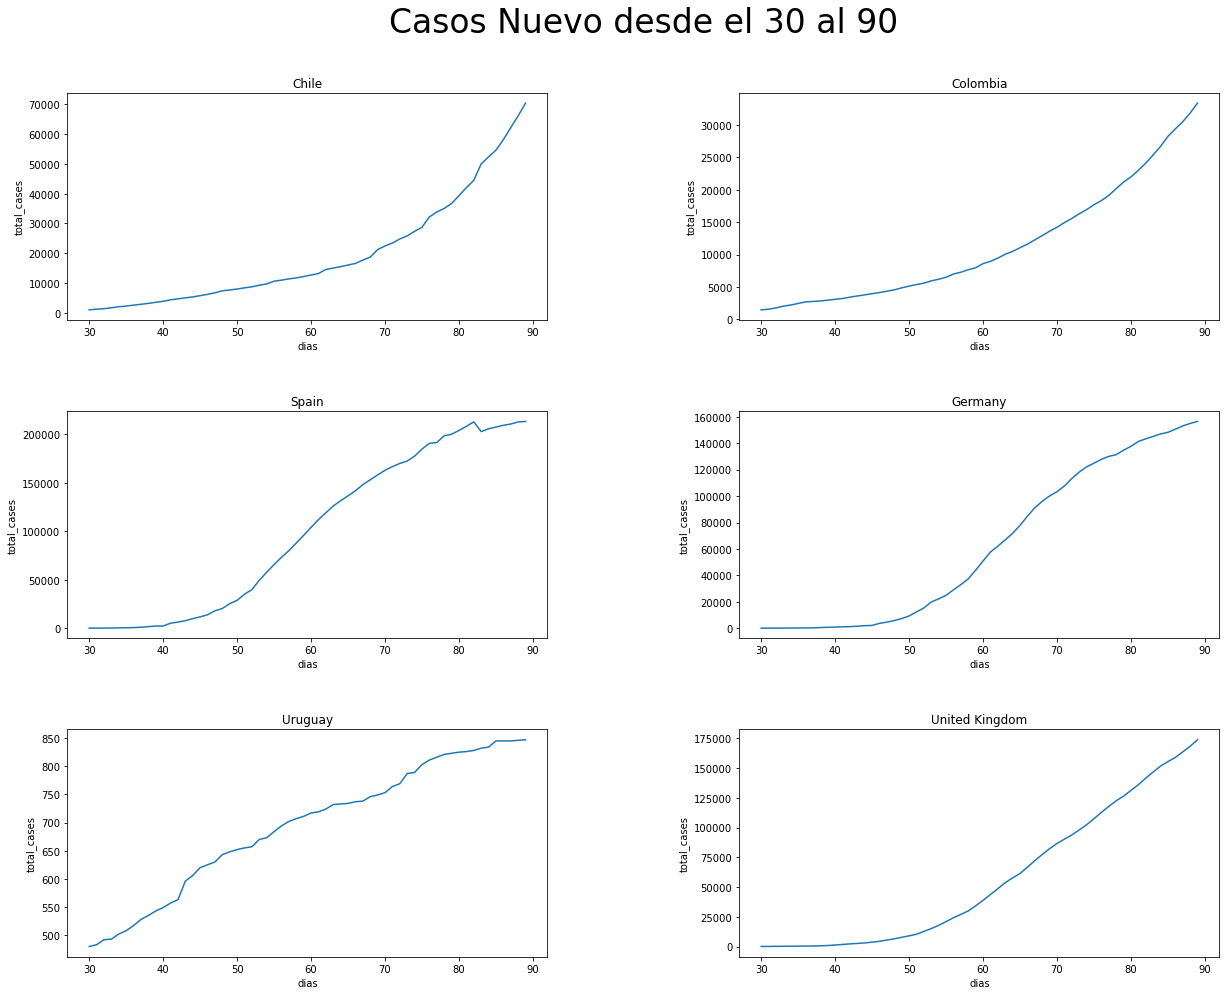

In [95]:
fig, ((ax1, ax2), (ax3, ax4),(ax5, ax6)) = plt.subplots(3, 2,figsize=(20,15))

sns.lineplot(x='dias',y='total_cases',data=df_cl[inicio:fin],ax=ax1).set_title('Chile')
sns.lineplot(x='dias',y='total_cases',data=df_co[inicio:fin],ax=ax2).set_title('Colombia')
sns.lineplot(x='dias',y='total_cases',data=df_sp[inicio:fin],ax=ax3).set_title('Spain')
sns.lineplot(x='dias',y='total_cases',data=df_ge[inicio:fin],ax=ax4).set_title('Germany')
sns.lineplot(x='dias',y='total_cases',data=df_ur[inicio:fin],ax=ax5).set_title('Uruguay')
sns.lineplot(x='dias',y='total_cases',data=df_uk[inicio:fin],ax=ax6).set_title('United Kingdom')

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
fig.suptitle('Casos Nuevo desde el 30 al 90', fontsize=33)

plt.show()

Text(0.5, 0.98, 'Casos Nuevo vs Total de Casos Paises Selecionados')

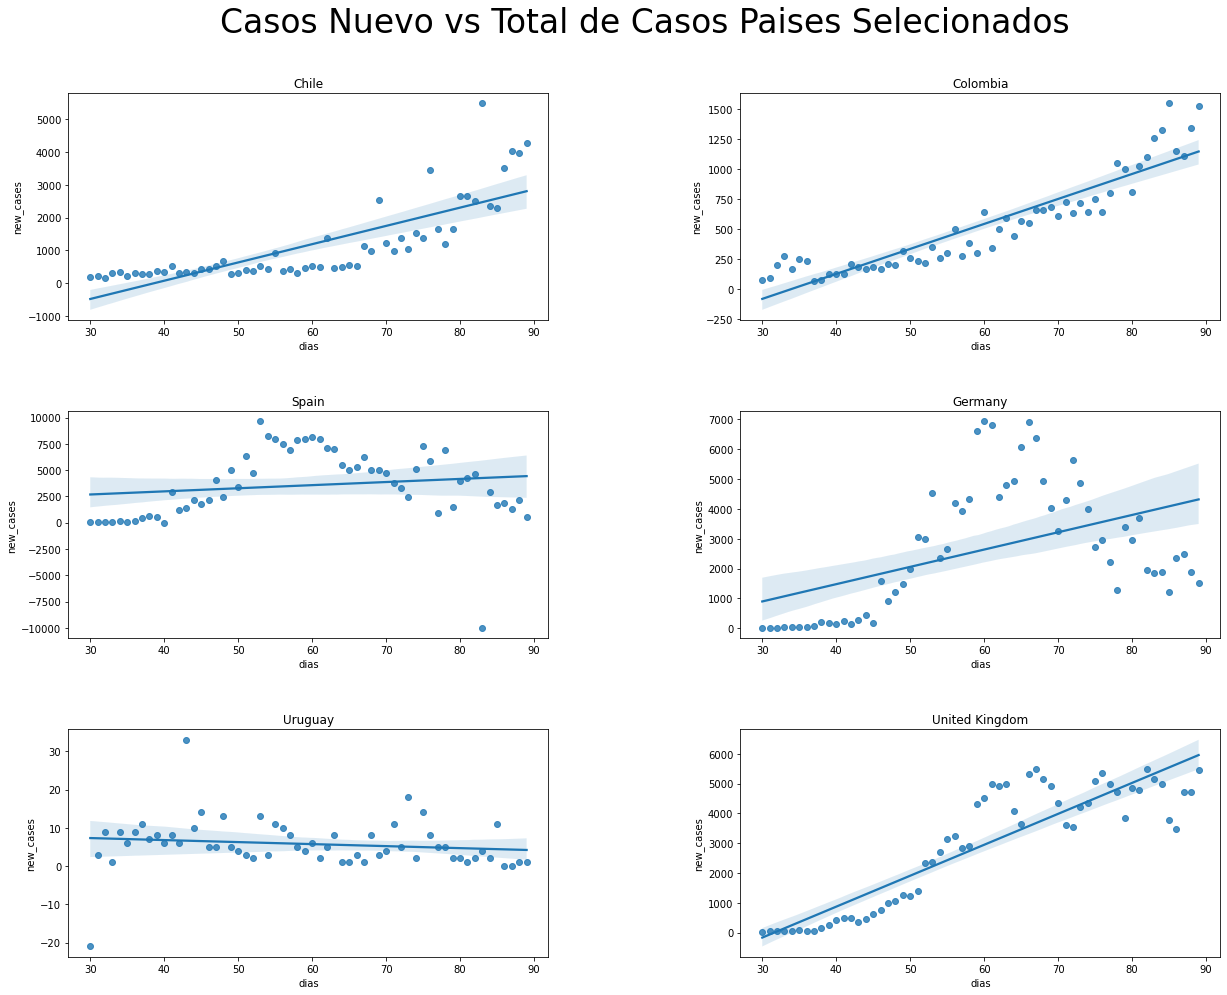

In [96]:
fig, ((ax1, ax2), (ax3, ax4),(ax5, ax6)) = plt.subplots(3, 2,figsize=(20,15))

sns.regplot(x='dias',y='new_cases',data=df_cl[inicio:fin],ax=ax1).set_title('Chile')
sns.regplot(x='dias',y='new_cases',data=df_co[inicio:fin],ax=ax2).set_title('Colombia')
sns.regplot(x='dias',y='new_cases',data=df_sp[inicio:fin],ax=ax3).set_title('Spain')
sns.regplot(x='dias',y='new_cases',data=df_ge[inicio:fin],ax=ax4).set_title('Germany')
sns.regplot(x='dias',y='new_cases',data=df_ur[inicio:fin],ax=ax5).set_title('Uruguay')
sns.regplot(x='dias',y='new_cases',data=df_uk[inicio:fin],ax=ax6).set_title('United Kingdom')

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
fig.suptitle('Casos Nuevo vs Total de Casos Paises Selecionados', fontsize=33)

¡Se ve bastante lineal! Aprovechemos esto para averiguar el $k$ utilizando un ajuste hecho con el método de cuadrados mínimos, ajustando los datos al modelo 

$Confirmados=e^{k(t-t_0)}$

### Estimacion de factor exponencial de contagios por pasies selecionados


In [98]:
#definimos función para ajustar modelo
def exponencial(t,k,t0):
  C=np.exp(k*(t-t0))
  return C

In [99]:
#chile
dias_cl = df_cl['dias'][inicio:fin]
casos_cl = df_cl['total_cases'][inicio:fin]
#colombia
dias_co = df_co['dias'][inicio:fin]
casos_co = df_co['total_cases'][inicio:fin]
#españa
dias_sp = df_sp['dias'][inicio:fin]
casos_sp = df_sp['total_cases'][inicio:fin]
#alemania
dias_ge = df_ge['dias'][inicio:fin]
casos_ge = df_ge['total_cases'][inicio:fin]
#uruguay
dias_ur = df_ur['dias'][inicio:fin]
casos_ur = df_ur['total_cases'][inicio:fin]
#reino unido
dias_uk = df_uk['dias'][inicio:fin]
casos_uk = df_uk['total_cases'][inicio:fin]

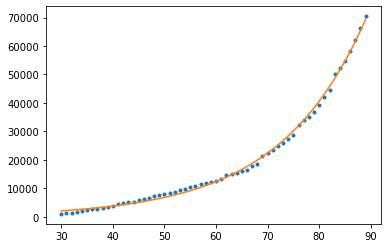

In [103]:
#Chile
diasp = dias_cl
casosp = casos_cl

popt, pcov = curve_fit(exponencial,diasp,casosp,maxfev=1000)
k=popt[0]
t0=popt[1]
casos_sim=exponencial(diasp,k,t0)
plt.plot(diasp,casosp,'.')
plt.plot(diasp,casos_sim)

k_cl = k

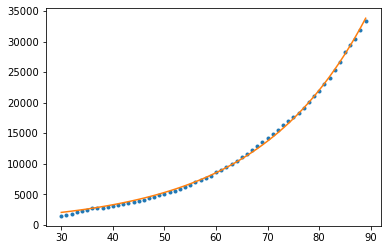

In [104]:
#colombia
diasp = dias_co
casosp = casos_co

popt, pcov = curve_fit(exponencial,diasp,casosp,maxfev=1000)
k=popt[0]
t0=popt[1]
casos_sim=exponencial(diasp,k,t0)
plt.plot(diasp,casosp,'.')
plt.plot(diasp,casos_sim)

k_co = k

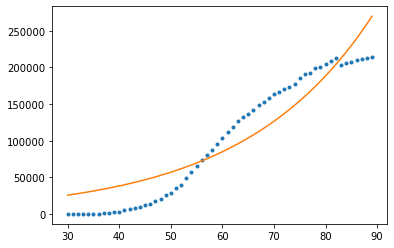

In [105]:
#españa
diasp = dias_sp
casosp = casos_sp

popt, pcov = curve_fit(exponencial,diasp,casosp,maxfev=1000)
k=popt[0]
t0=popt[1]
casos_sim=exponencial(diasp,k,t0)
plt.plot(diasp,casosp,'.')
plt.plot(diasp,casos_sim)

k_sp = k

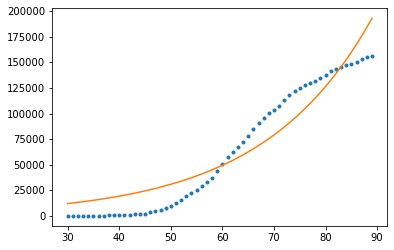

In [134]:
#Alemania
diasp = dias_ge
casosp = casos_ge

popt, pcov = curve_fit(exponencial,diasp,casosp,maxfev=1000)
k=popt[0]
t0=popt[1]
casos_sim=exponencial(diasp,k,t0)
plt.plot(diasp,casosp,'.')
plt.plot(diasp,casos_sim)

k_ge = k

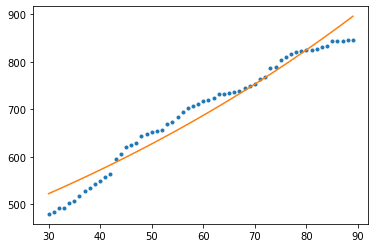

In [112]:
#Uruguay
diasp = dias_ur
casosp = casos_ur

popt, pcov = curve_fit(exponencial,diasp,casosp,maxfev=1000)
k=popt[0]
t0=popt[1]
casos_sim=exponencial(diasp,k,t0)
plt.plot(diasp,casosp,'.')
plt.plot(diasp,casos_sim)

k_ur = k

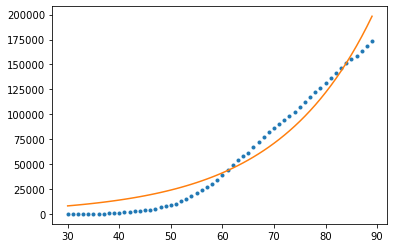

In [111]:
#Reino Unido
diasp = dias_uk
casosp = casos_uk

popt, pcov = curve_fit(exponencial,diasp,casosp,maxfev=1000)
k=popt[0]
t0=popt[1]
casos_sim=exponencial(diasp,k,t0)
plt.plot(diasp,casosp,'.')
plt.plot(diasp,casos_sim)

k_uk = k

###### Intervalo de confianza paises selecionados

In [129]:
k_comp = [k_cl,k_co,k_ur,k_sp,k_ge,k_uk]
pais_k = ['cl','co','ur','sp','ge','uk']
k_comp = pd.DataFrame(k_comp,pais_k)
k_comp, k_comp.describe()

(           0
 cl  0.059585
 co  0.047422
 ur  0.009139
 sp  0.039832
 ge  0.046960
 uk  0.054103,
               0
 count  6.000000
 mean   0.042840
 std    0.017833
 min    0.009139
 25%    0.041614
 50%    0.047191
 75%    0.052433
 max    0.059585)

[0    0.010934
dtype: float64, 0    0.055866
dtype: float64]
0    0.044933
dtype: float64


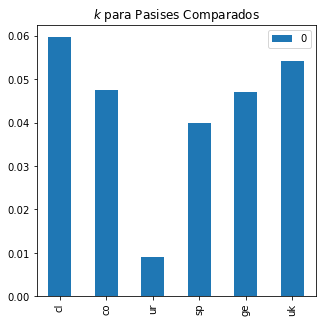

In [137]:
mu_kcomp=np.mean(k_comp)
sigma_ks=np.std(k_comp)
z=1.96
n=len(k_comp)
int_conf= [mu_kcomp-z*sigma_ks/np.sqrt(1),mu_kcomp+z*sigma_ks/np.sqrt(n)]
print(f"{int_conf }")

print(f"{(int_conf[1] - int_conf[0])}")
k_comp.plot(kind="bar",figsize=(5,5),title='$k$ para Pasises Comparados')
plt.show()

######  Podemos observar que la probabilidad que la media del factor exponencial de contagios K este entre un 0.0109 y 0.0558 con una diferencia de 0.449, lo que parece ser muy grande para poder tener una representacion mas precisa. Esto es por que los valor de Ur afecta de manera significativa la muestra.

###### Intervalo de confianza sin Uruguay

In [128]:
k_comp2 = [k_cl,k_co,k_sp,k_ge,k_uk]
pais_k2 = ['cl','co','sp','ge','uk']
k_comp2 = pd.DataFrame(k_comp2,pais_k2)
k_comp2, k_comp2.describe()

(           0
 cl  0.059585
 co  0.047422
 sp  0.039832
 ge  0.046960
 uk  0.054103,
               0
 count  5.000000
 mean   0.049581
 std    0.007535
 min    0.039832
 25%    0.046960
 50%    0.047422
 75%    0.054103
 max    0.059585)

[0    0.036372
dtype: float64, 0    0.055488
dtype: float64]
0    0.019116
dtype: float64


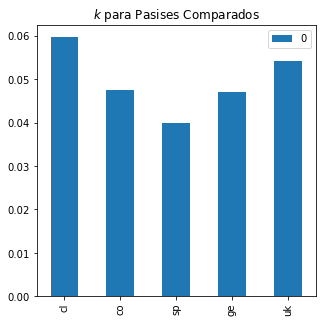

In [138]:
mu_kcomp=np.mean(k_comp2)
sigma_ks=np.std(k_comp2)
z=1.96
n=len(k_comp2)
int_conf= [mu_kcomp-z*sigma_ks/np.sqrt(1),mu_kcomp+z*sigma_ks/np.sqrt(n)]
print(f"{int_conf }")

print(f"{(int_conf[1] - int_conf[0])}")
k_comp2.plot(kind="bar",figsize=(5,5),title='$k$ para Pasises Comparados')
plt.show()

###### Es posible observar que una vez eliminado Ur nuestro intervalo de confianza se reduce a 0.03 y 0.055 lo que no es una reduccion significativa en relacion a los paises de la muestra, pero reduciendo la diferencia a 0.019, mucho menor que la anterior 0.044.

In [139]:
from pycaret.regression import * 

exp1 = setup(data = df_cl, target = 'new_cases',  train_size = 0.7, data_split_shuffle=True, session_id = 2)

,Description,Value
0,session_id,2
1,Target,new_cases
2,Original Data,"(635, 68)"
3,Missing Values,True
4,Numeric Features,53
5,Categorical Features,13
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(444, 63)"


In [140]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.0053,0.0000,0.0062,1.0000,0.0002,0.0000,1.3170
lasso,Lasso Regression,4.8543,40.0515,6.1240,1.0000,0.2211,0.0293,0.0220
ridge,Ridge Regression,0.0054,0.0000,0.0063,1.0000,0.0003,0.0000,0.0200
en,Elastic Net,4.8642,38.8687,6.0956,1.0000,0.2331,0.0323,0.0180
lar,Least Angle Regression,0.2046,0.7947,0.4125,1.0000,0.0023,0.0002,0.0300
omp,Orthogonal Matching Pursuit,0.0051,0.0000,0.0058,1.0000,0.0002,0.0000,0.0170
br,Bayesian Ridge,0.0053,0.0000,0.0062,1.0000,0.0002,0.0000,0.0170
llar,Lasso Least Angle Regression,16.0611,404.6962,19.8886,0.9999,0.4228,0.1354,0.0190
xgboost,Extreme Gradient Boosting,47.5185,8604.2622,89.0804,0.9984,0.1851,0.0389,0.3120
et,Extra Trees Regressor,37.4204,19416.0849,106.7725,0.9971,0.1187,0.0269,0.4320


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [141]:
#Fold-k indica el numero de validaciones cruzadas para el modelo
lgbm = create_model(
    estimator='lightgbm',
    fold=5
)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,53.8698,11534.8814,107.4006,0.9972,0.6173,0.0583
1,80.6554,33620.0688,183.3578,0.9934,0.5543,0.0370
2,133.9022,327032.9891,571.8680,0.9529,0.3081,0.0408
3,86.1057,182604.0487,427.3219,0.9644,0.2319,0.0722
4,62.7755,16299.0920,127.6679,0.9969,0.3614,0.0488
Mean,83.4617,114218.2160,283.5232,0.9810,0.4146,0.0514
SD,27.7947,123769.8131,183.9369,0.0186,0.1471,0.0127


In [143]:
new_casse_predict =  predict_model(lgbm, data=df_cl)
new_casse_predict.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,dias,Label
24088,CHL,South America,Chile,2020-02-23,2.0,2.0,NaN,NaN,NaN,NaN,...,NaN,2.11,80.18,0.851,205.0,1.3,-3.54,10.670213,0,1.121289
24089,CHL,South America,Chile,2020-02-24,2.0,0.0,NaN,NaN,NaN,NaN,...,NaN,2.11,80.18,0.851,NaN,NaN,NaN,NaN,1,1.121289
24090,CHL,South America,Chile,2020-02-25,2.0,0.0,NaN,NaN,NaN,NaN,...,NaN,2.11,80.18,0.851,NaN,NaN,NaN,NaN,2,1.575426
24091,CHL,South America,Chile,2020-02-26,2.0,0.0,NaN,NaN,NaN,NaN,...,NaN,2.11,80.18,0.851,NaN,NaN,NaN,NaN,3,1.121289
24092,CHL,South America,Chile,2020-02-27,2.0,0.0,NaN,NaN,NaN,NaN,...,NaN,2.11,80.18,0.851,NaN,NaN,NaN,NaN,4,1.121289


In [144]:
new_casse_predict.rename(columns={'Label':'new_case_p'}, inplace=True)
new_casse_predict = new_casse_predict[['location','date','new_case_p']]


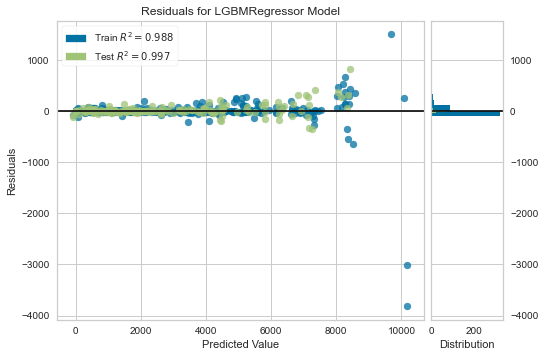

In [145]:
plot_model(lgbm)

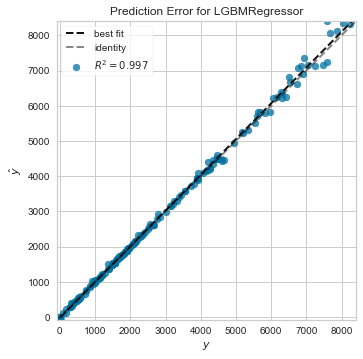

In [146]:
plot_model(lgbm, plot = 'error')